# The extinction class: RedCorr()

In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

The class RedCorr manages the extinction (reddening) correction. It can compute the logarithmic extinction at H$\beta$ by comparing an observed ratio to a theoretical one (usually H$\alpha$/H$\beta$, but any other ratio can be used). The object is also able to compute the correction to be applied to any intensity, given the wavelength of the line.

Various extinction laws are included in the class, and any user-defined function can also be implemented. The available extinction laws can be listed by entering (here no need to instantiate an object):

To explore some properties, you can directly use the class methods:

In [2]:
pn.RedCorr().printLaws()

'No correction': 
        No correction, return 0.0
        
        
'CCM89': 
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C
        
        Parameters:
            wave:  wavelength (Angstrom)

        **Comments:**
        
        Depends on R_V, default value being 3.1

        Scope: Applicable to both dense and diffuse ISM
        Range: UV through IR
        
        
'CCM89 Bal07': 
        Galactic extinction law based on Cardelli et al 1989, modified by Blagrave et al 2007 
        for 3.3 < x < 8 (1250 < lambda < 3030)
        
        Blagrave et al 2007, ApJ, 655, 299 
        http://adsabs.harvard.edu/abs/2007ApJ...655..299B
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C
        
        Parameters:
            wave:  wavelength (Angstrom)

        **Comments:**
        
        Same as CCM89 for x<3.3 and x>8
        Revised values for 3.3<

Less detailed output is obtained with:

In [3]:
pn.RedCorr().getLaws()

dict_keys(['No correction', 'CCM89', 'CCM89 Bal07', 'CCM89 oD94', 'S79 H83 CCM89', 'K76', 'SM79 Gal', 'G03 LMC', 'MCC99 FM90 LMC', 'F99-like', 'F99', 'F88 F99 LMC', 'Cal00'])

To apply a correction, you need to instantiate the object:

In [4]:
rc = pn.RedCorr(E_BV = 1.2, R_V = 3.2, law = 'F99')

The parameters can also be defined and modified after the instantiation:

In [23]:
rc = pn.RedCorr() 
rc.E_BV = 1.34
rc.law = 'S79 H83 CCM89'

$c(H\beta)$ and $E_{B-V}$ are related through:
    
$(1-f_\lambda).c(H\beta) = 0.4 E_{B-V} X_\lambda$ applied to $\lambda$ = 4861, with $f_\beta$ = 0.
so that, once one of the two parameters is defined, the other is also automatically defined; to output its value, enter:

In [24]:
rc.cHbeta

1.9457101047071228

In [25]:
rc.cHbeta = 2.
print(rc.E_BV)

1.3773891565431358


The reddening of a given spectrum is determined by using the ratio of two observed line intensities relative to the theoretical value, for example:

In [9]:
rc.setCorr(obs_over_theo=6.5 / 2.86, wave1=6563., wave2=4861.)

In [10]:
print(rc.cHbeta)

1.1134093776707101


Once a law and either c(H$\beta$) or E$_{B-V}$ are defined, the correction for any wavelength is obtained by:

In [12]:
wave = 5007.0
corr = rc.getCorr(wave)
print(corr)

11.846898279423378


where __wave__ can either be a single wavelength or a list or array of wavelengths.

The correction relative to the H$\beta$ correction is given by:

In [13]:
corr = rc.getCorrHb(wave)
print(corr)

0.9124210200172395


and the correction relative to any other wavelength (p. ej., H$\alpha$) is given by:

In [14]:
corr = rc.getCorr(5007., 6563.)
print(corr)

2.07325069462699


The class includes a plotting tool to have a quick look at the different extinction laws:

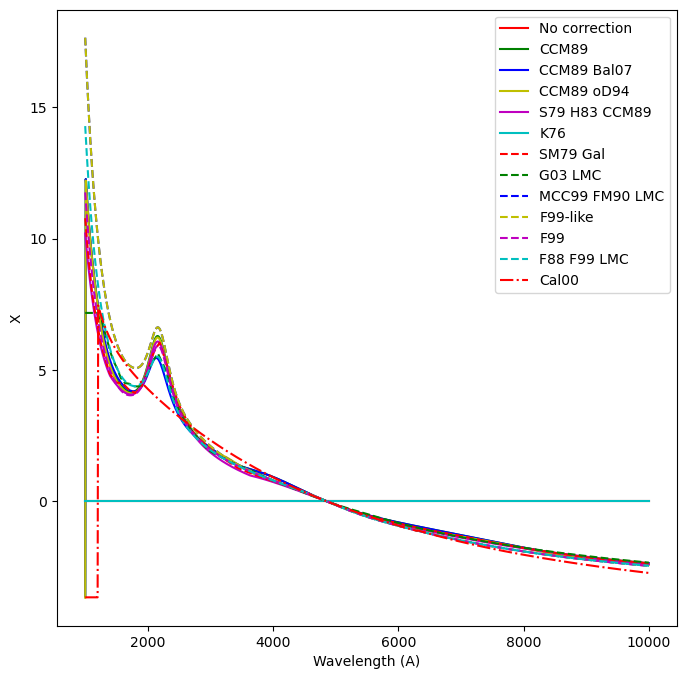

In [15]:
f, ax = plt.subplots(figsize=(8,8))
rc.plot(laws = 'all', ax=ax)

A user-defined method can also be used. User-defined methods must accept 2 parameters: the first is the wavelength (or wavelength array), in Angstrom, and the second is an optional parameter (which can also be a list). The method must return $X(\lambda) = A(\lambda)/E_{B-V} = R_V A(\lambda)/A_V$. The correction is then: $10^{0.4 E_{B-V} X(\lambda)}$

Here is an example of a user-defined function:

In [16]:
def my_X(wave, params = [5000., 1., 2., 3.]):
    return params[1] * (wave/params[0]) + params[2] * (wave/params[0])**-1 + params[3] * (wave/params[0])**-2
rc.UserFunction = my_X
rc.UserParams = [6000., 1., 5., 1.]
rc.law = 'user'
print(rc.getCorr(5007))

342.0931612017285


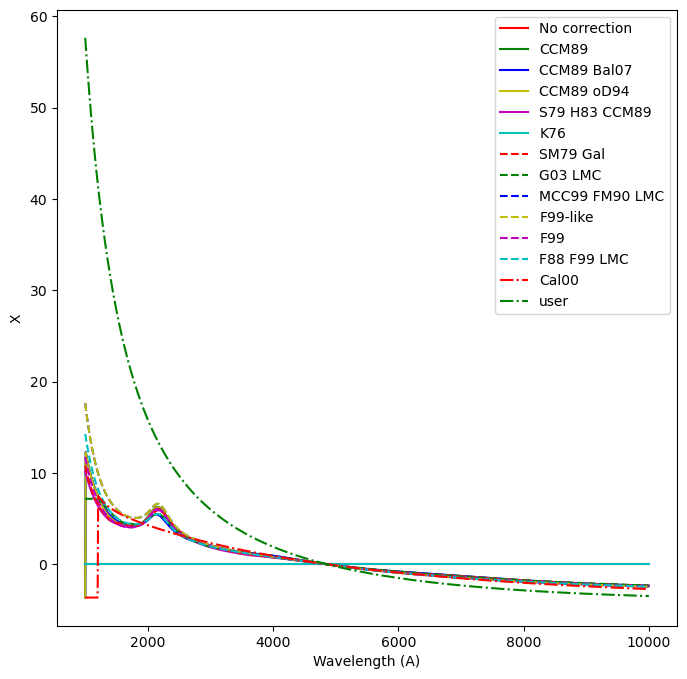

In [17]:
f, ax = plt.subplots(figsize=(8,8))
rc.plot(laws = 'all', ax=ax)